In [1]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Inflection depths per location (pre and post)
location_post_dict = {1: [], 2: [], 3: [], 4: []}
location_pre_dict = {1: [], 2: [], 3: [], 4: []}

# Collect inflection depths
for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()

        if derm_scan.location not in [1, 2, 3, 4]:
            continue

        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)

        if derm_scan.min_location_index is None:
            continue  # skip bad scans

        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]

        if derm_scan.exposed:
            location_post_dict[derm_scan.location].append(inflection_depth)
        else:
            location_pre_dict[derm_scan.location].append(inflection_depth)

# Helper function to remove outliers using IQR method
def remove_outliers(data):
    if len(data) < 4:
        return data  # skip IQR filtering for small lists
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return [x for x in data if lower <= x <= upper]

# Filter and compute averages
pre_averages = {}
post_averages = {}

for loc in [1, 2, 3, 4]:
    pre_filtered = remove_outliers(location_pre_dict[loc])
    post_filtered = remove_outliers(location_post_dict[loc])
    location_pre_dict[loc] = pre_filtered  # (optional) update dict if you plan to plot it
    location_post_dict[loc] = post_filtered

    pre_averages[loc] = np.mean(pre_filtered) if pre_filtered else np.nan
    post_averages[loc] = np.mean(post_filtered) if post_filtered else np.nan

# Print cleaned means
print("Pre-exposure averages (outliers removed):", pre_averages)
print("Post-exposure averages (outliers removed):", post_averages)

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

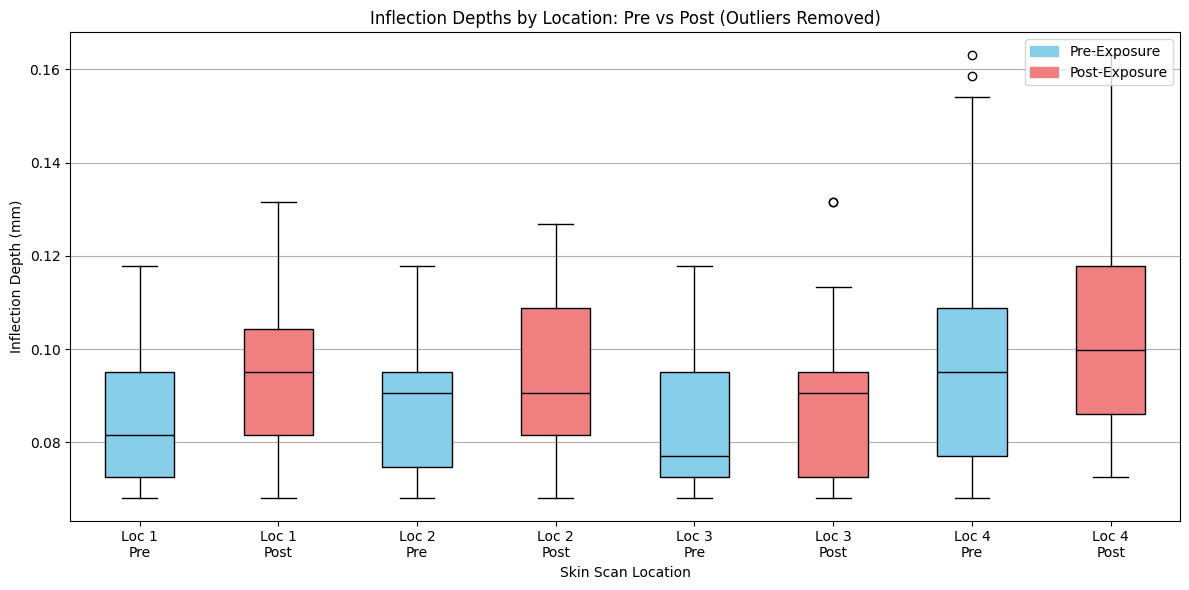

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Reorder and prepare data
combined_data = []
combined_labels = []
box_colors = []

for loc in [1, 2, 3, 4]:
    combined_data.append(location_pre_dict[loc])
    combined_labels.append(f"Loc {loc}\nPre")
    box_colors.append('skyblue')

    combined_data.append(location_post_dict[loc])
    combined_labels.append(f"Loc {loc}\nPost")
    box_colors.append('lightcoral')

# Boxplot with black median lines
boxplots = plt.boxplot(
    combined_data,
    patch_artist=True,
    labels=combined_labels,
    medianprops=dict(color='black')  # 🟢 Make median line black
)

# Set box colors
for patch, color in zip(boxplots['boxes'], box_colors):
    patch.set_facecolor(color)

# Styling
plt.title("Inflection Depths by Location: Pre vs Post (Outliers Removed)")
plt.ylabel("Inflection Depth (mm)")
plt.xlabel("Skin Scan Location")
plt.grid(True, axis='y')
plt.tight_layout()

# Legend
import matplotlib.patches as mpatches
plt.legend(
    handles=[
        mpatches.Patch(color='skyblue', label='Pre-Exposure'),
        mpatches.Patch(color='lightcoral', label='Post-Exposure')
    ],
    loc='upper right'
)

plt.show()

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

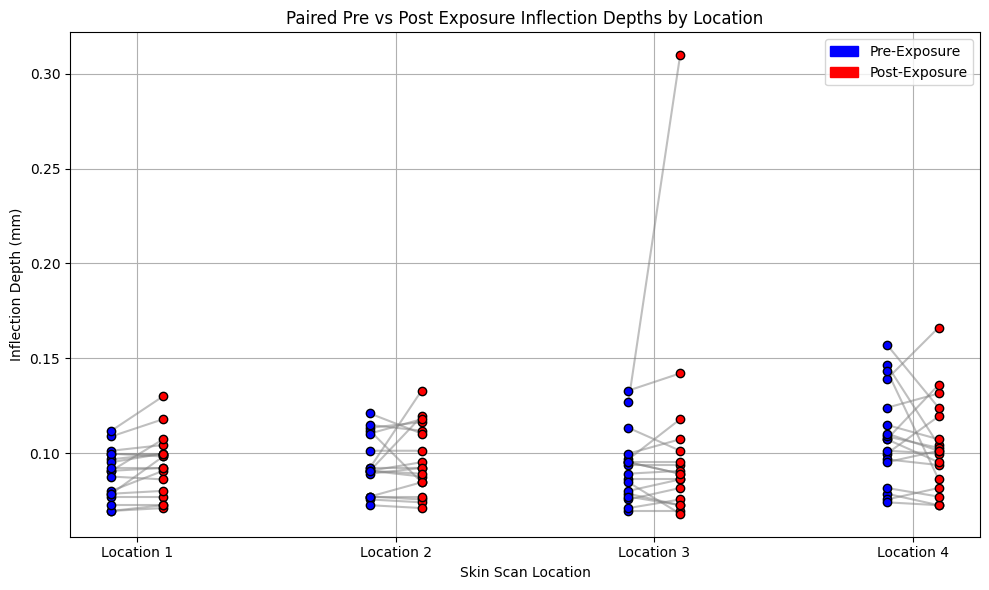

In [17]:
import data_read
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Function to remove outliers from a list using the IQR method
def remove_outliers(data):
    if len(data) < 4:
        return data  # Not enough points for IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return [x for x in data if lower <= x <= upper]

# Initialize per-subject per-location storage
subject_pre_data = {}   # {subject_id: {location: [depths]}}
subject_post_data = {}

vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Collect scan data
for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    if subject_id not in subject_pre_data:
        subject_pre_data[subject_id] = {1: [], 2: [], 3: [], 4: []}
        subject_post_data[subject_id] = {1: [], 2: [], 3: [], 4: []}

    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        if derm_scan.location not in [1, 2, 3, 4]:
            continue

        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)

        if derm_scan.min_location_index is None:
            continue

        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]

        if derm_scan.exposed:
            subject_post_data[subject_id][derm_scan.location].append(inflection_depth)
        else:
            subject_pre_data[subject_id][derm_scan.location].append(inflection_depth)

# Plotting all locations on one plot
plt.figure(figsize=(10, 6))

for loc in [1, 2, 3, 4]:
    for subject_id in subject_ids:
        pre_vals = remove_outliers(subject_pre_data.get(subject_id, {}).get(loc, []))
        post_vals = remove_outliers(subject_post_data.get(subject_id, {}).get(loc, []))

        if pre_vals and post_vals:
            avg_pre = np.mean(pre_vals)
            avg_post = np.mean(post_vals)

            x_vals = [loc - 0.1, loc + 0.1]
            y_vals = [avg_pre, avg_post]

            # Line
            plt.plot(x_vals, y_vals, color='gray', alpha=0.5)

            # Dots
            plt.scatter(loc - 0.1, avg_pre, color='blue', edgecolor='black', zorder=3)
            plt.scatter(loc + 0.1, avg_post, color='red', edgecolor='black', zorder=3)

# Legend
blue_patch = mpatches.Patch(color='blue', label='Pre-Exposure')
red_patch = mpatches.Patch(color='red', label='Post-Exposure')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')

# Labeling
plt.xticks([1, 2, 3, 4], [f"Location {i}" for i in range(1, 5)])
plt.xlabel("Skin Scan Location")
plt.ylabel("Inflection Depth (mm)")
plt.title("Paired Pre vs Post Exposure Inflection Depths by Location")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Setup paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Initialize dictionaries to hold subject-level average inflection depths
initial_pre_avg = {1: [], 2: [], 3: [], 4: []}
initial_post_avg = {1: [], 2: [], 3: [], 4: []}
return_pre_avg = {1: [], 2: [], 3: [], 4: []}
return_post_avg = {1: [], 2: [], 3: [], 4: []}

# Loop through unique subject IDs (without "_2")
for subject_id in subject_ids:
    # Process both initial and return visits
    subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    # Only proceed if both visits are available
    if subject.visit is None or subject.return_visit is None:
        continue

    # Function to group scans by exposure and location
    def compute_avg_by_location(scan_list):
        pre_temp = {1: [], 2: [], 3: [], 4: []}
        post_temp = {1: [], 2: [], 3: [], 4: []}

        for derm_scan in scan_list:
            derm_scan.get_normalize_a_scan()

            if derm_scan.location not in [1, 2, 3, 4]:
                continue

            derm_scan.approach_1(15)
            if derm_scan.min_location_index is None:
                derm_scan.approach_2(15, 200)

            if derm_scan.min_location_index is None:
                continue  # skip if still no valid inflection point

            inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]

            if derm_scan.exposed:
                post_temp[derm_scan.location].append(inflection_depth)
            else:
                pre_temp[derm_scan.location].append(inflection_depth)

        # Compute per-location averages
        pre_avg = {loc: np.mean(vals) for loc, vals in pre_temp.items() if vals}
        post_avg = {loc: np.mean(vals) for loc, vals in post_temp.items() if vals}
        return pre_avg, post_avg

    # Get averages for initial and return visits
    init_pre, init_post = compute_avg_by_location(subject.visit.epidermal)
    ret_pre, ret_post = compute_avg_by_location(subject.return_visit.epidermal)

    # Add to final group-level dictionaries
    for loc in [1, 2, 3, 4]:
        if loc in init_pre:
            initial_pre_avg[loc].append(init_pre[loc])
        if loc in init_post:
            initial_post_avg[loc].append(init_post[loc])
        if loc in ret_pre:
            return_pre_avg[loc].append(ret_pre[loc])
        if loc in ret_post:
            return_post_avg[loc].append(ret_post[loc])

# --------------------------------------------
# Outlier removal for Location 4 only (IQR method)
# --------------------------------------------

def remove_outliers(data):
    if len(data) < 4:
        return data
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return [x for x in data if lower <= x <= upper]

initial_pre_avg[4] = remove_outliers(initial_pre_avg[4])
initial_post_avg[4] = remove_outliers(initial_post_avg[4])
return_pre_avg[4] = remove_outliers(return_pre_avg[4])
return_post_avg[4] = remove_outliers(return_post_avg[4])

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

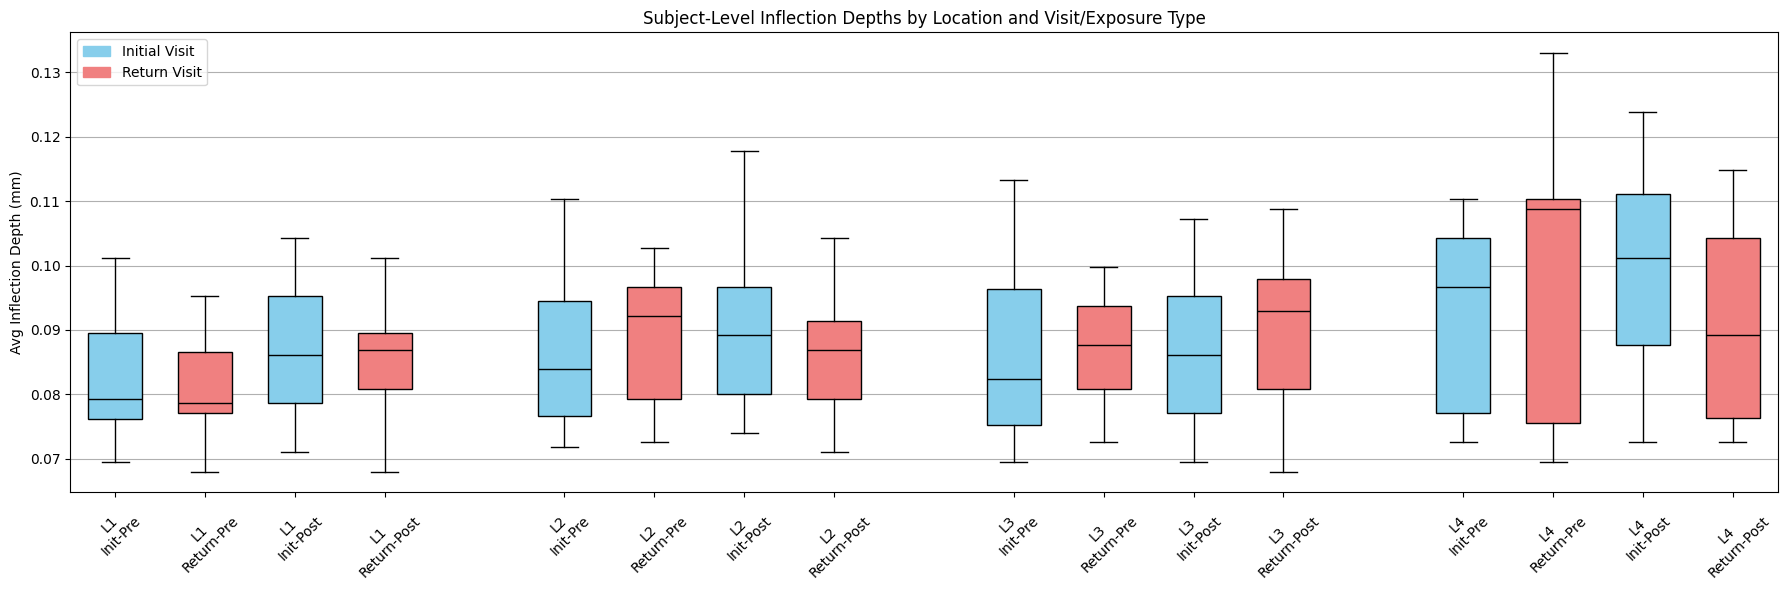

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Group data and labels for plotting
plot_data = []
plot_labels = []
plot_colors = []
plot_positions = []

position = 1

for loc in [1, 2, 3, 4]:
    # Initial Pre
    plot_data.append(initial_pre_avg[loc])
    plot_labels.append(f"L{loc}\nInit-Pre")
    plot_colors.append('skyblue')
    plot_positions.append(position)
    position += 1

    # Return Pre
    plot_data.append(return_pre_avg[loc])
    plot_labels.append(f"L{loc}\nReturn-Pre")
    plot_colors.append('lightcoral')
    plot_positions.append(position)
    position += 1

    # Initial Post
    plot_data.append(initial_post_avg[loc])
    plot_labels.append(f"L{loc}\nInit-Post")
    plot_colors.append('skyblue')
    plot_positions.append(position)
    position += 1

    # Return Post
    plot_data.append(return_post_avg[loc])
    plot_labels.append(f"L{loc}\nReturn-Post")
    plot_colors.append('lightcoral')
    plot_positions.append(position)
    position += 2  # extra space between locations

# Create the plot
plt.figure(figsize=(18, 6))

# Draw colored boxes manually
for i in range(len(plot_data)):
    bplot = plt.boxplot(
        plot_data[i],
        positions=[plot_positions[i]],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor=plot_colors[i], color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(markerfacecolor='gray', marker='o', alpha=0.3)
    )

# Formatting
plt.xticks(plot_positions, plot_labels, rotation=45)
plt.ylabel("Avg Inflection Depth (mm)")
plt.title("Subject-Level Inflection Depths by Location and Visit/Exposure Type")
plt.grid(True, axis='y')
plt.tight_layout()

# Legend
plt.legend(handles=[
    mpatches.Patch(color='skyblue', label='Initial Visit'),
    mpatches.Patch(color='lightcoral', label='Return Visit')
], loc='upper left')

plt.show()

In [15]:
from scipy.stats import mannwhitneyu

print("Initial vs Return Visit Comparison at Each Location (Subject-Level Averages, Outliers Removed for Location 4):\n")

for loc in [1, 2, 3, 4]:
    pre_init = initial_pre_avg[loc]
    pre_ret = return_pre_avg[loc]
    post_init = initial_post_avg[loc]
    post_ret = return_post_avg[loc]

    # Pre Exposure Comparison
    if len(pre_init) >= 3 and len(pre_ret) >= 3:
        stat_pre, p_pre = mannwhitneyu(pre_init, pre_ret, alternative='two-sided')
        print(f"Location {loc} - Pre Exposure: p = {p_pre:.4f}")
    else:
        print(f"Location {loc} - Pre Exposure: Not enough data (n_init={len(pre_init)}, n_ret={len(pre_ret)})")

    # Post Exposure Comparison
    if len(post_init) >= 3 and len(post_ret) >= 3:
        stat_post, p_post = mannwhitneyu(post_init, post_ret, alternative='two-sided')
        print(f"Location {loc} - Post Exposure: p = {p_post:.4f}")
    else:
        print(f"Location {loc} - Post Exposure: Not enough data (n_init={len(post_init)}, n_ret={len(post_ret)})")

Initial vs Return Visit Comparison at Each Location (Subject-Level Averages, Outliers Removed for Location 4):

Location 1 - Pre Exposure: p = 0.8322
Location 1 - Post Exposure: p = 0.7280
Location 2 - Pre Exposure: p = 0.5982
Location 2 - Post Exposure: p = 0.7789
Location 3 - Pre Exposure: p = 0.9581
Location 3 - Post Exposure: p = 0.6126
Location 4 - Pre Exposure: p = 0.6544
Location 4 - Post Exposure: p = 0.4057


In [16]:
from scipy.stats import wilcoxon

print("Pre vs Post Comparison Within Each Visit (Wilcoxon Signed-Rank Test):\n")

for loc in [1, 2, 3, 4]:
    init_pre = initial_pre_avg[loc]
    init_post = initial_post_avg[loc]
    ret_pre = return_pre_avg[loc]
    ret_post = return_post_avg[loc]

    # Ensure matched pairs
    n_init = min(len(init_pre), len(init_post))
    n_ret = min(len(ret_pre), len(ret_post))

    # Initial visit comparison
    if n_init >= 3:
        try:
            stat, p = wilcoxon(init_pre[:n_init], init_post[:n_init])
            print(f"Location {loc} - Initial Visit: p = {p:.4f}")
        except ValueError as e:
            print(f"Location {loc} - Initial Visit: Wilcoxon test error ({e})")
    else:
        print(f"Location {loc} - Initial Visit: Not enough paired data")

    # Return visit comparison
    if n_ret >= 3:
        try:
            stat, p = wilcoxon(ret_pre[:n_ret], ret_post[:n_ret])
            print(f"Location {loc} - Return Visit: p = {p:.4f}")
        except ValueError as e:
            print(f"Location {loc} - Return Visit: Wilcoxon test error ({e})")
    else:
        print(f"Location {loc} - Return Visit: Not enough paired data")

Pre vs Post Comparison Within Each Visit (Wilcoxon Signed-Rank Test):

Location 1 - Initial Visit: p = 0.6875
Location 1 - Return Visit: p = 0.2188
Location 2 - Initial Visit: p = 1.0000
Location 2 - Return Visit: p = 0.5703
Location 3 - Initial Visit: p = 0.8125
Location 3 - Return Visit: p = 0.2188
Location 4 - Initial Visit: p = 0.5781
Location 4 - Return Visit: p = 0.2188
